In [ ]:
# 文件bankpep.csv存放着银行储户的基本信息，请通过绘图对这些客户数据进行探索性分析。
# （1）客户年龄分布的直方图和密度图
# （2）客户年龄和收入关系的散点图
# （3）绘制散点图观察账户（年龄，收入，孩子数）之间的关系，对角线显示直方图
# （4）按区域展示平均收入的柱状图，并显示标准差
# （5）多子图绘制：账户中性别占比饼图，有车的性别占比饼图，按孩子数的账户占比饼图
# （6）各性别收入的箱须图

In [ ]:
# （1）客户年龄分布的直方图和密度图

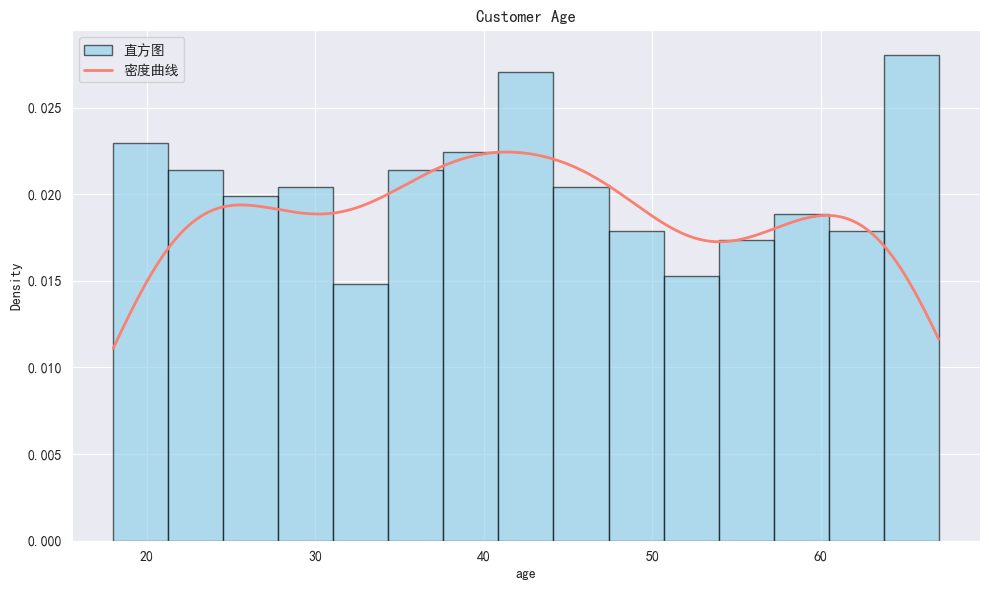

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np

# 设置中文字体和解决负号显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
data = pd.read_csv("bankpep.csv")

# 提取年龄数据
ages = data['age'].dropna()  # 确保无缺失值

# 创建图表
plt.figure(figsize=(10, 6))

# 绘制直方图（设置为密度模式）
plt.hist(ages, bins=15, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='直方图')

# 计算核密度估计
kde = gaussian_kde(ages)
x_values = np.linspace(min(ages), max(ages), 1000)
density = kde(x_values)

# 绘制密度曲线
plt.plot(x_values, density, color='salmon', lw=2, label='密度曲线')

# 设置图表标题和坐标轴标签
plt.title('Customer Age')
plt.xlabel('age')
plt.ylabel('Density')
plt.legend()

# 显示网格
plt.grid(True)

# 显示图表
plt.tight_layout()
plt.show()

In [ ]:
# （2）客户年龄和收入关系的散点图

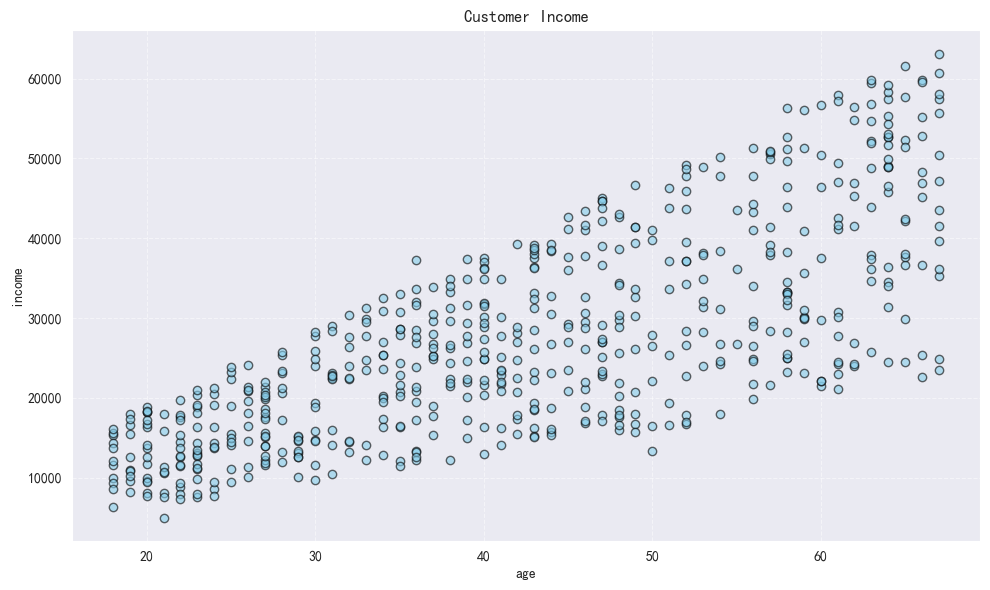

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 设置中文字体和解决负号显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
data = pd.read_csv("bankpep.csv")

# 提取年龄数据
ages = data['age'].dropna()  # 确保无缺失值
incomes=data['income'].dropna()

# 创建图表
plt.figure(figsize=(10, 6))
plt.scatter(ages, incomes, alpha=0.6, color='skyblue', edgecolor='black')

# 设置图表标题和坐标轴标签
plt.title('Customer Income')
plt.xlabel('age')
plt.ylabel('income')
plt.grid(True, linestyle='--', alpha=0.5)

# 自动调整布局
plt.tight_layout()

# 显示图表
plt.show()

In [ ]:
#（3）绘制散点图观察账户（年龄，收入，孩子数）之间的关系，对角线显示直方图

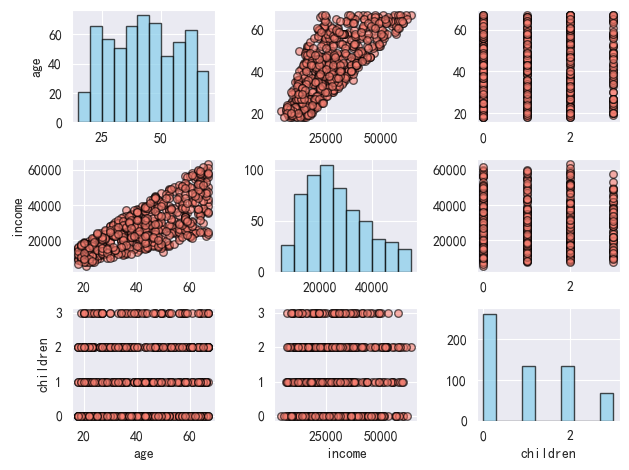

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# 设置中文字体和解决负号显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
data = pd.read_csv("bankpep.csv")

# 提取年龄数据
ages = data['age'].dropna()  # 确保无缺失值
incomes=data['income'].dropna()
children=data['children'].dropna()

# 创建图表
fig=plt.figure()

age_age_area=fig.add_subplot(3,3,1)
income_age_area=fig.add_subplot(3,3,2)
children_age_area=fig.add_subplot(3,3,3)
age_income_area=fig.add_subplot(3,3,4)
income_income_area=fig.add_subplot(3,3,5)
children_income_area=fig.add_subplot(3,3,6)
age_children_area=fig.add_subplot(3,3,7)
income_children_area=fig.add_subplot(3,3,8)
children_children_area=fig.add_subplot(3,3,9)


age_age_area.set_ylabel('age')
bins = [15,20, 25,30,35, 40,45, 50,55, 60,65, 70]
age_age_area.hist(ages, bins=bins, color='skyblue', edgecolor='black', alpha=0.7)


income_age_area.scatter(incomes, ages, alpha=0.6, color='salmon', edgecolor='black', s=30)
# 设置标题和轴标签
children_age_area.scatter(children, ages, alpha=0.6, color='salmon', edgecolor='black', s=30)
age_income_area.scatter(ages,incomes, alpha=0.6, color='salmon', edgecolor='black', s=30)
age_income_area.set_ylabel('income')

income_bins = [5000, 10000,15000,20000, 25000,30000, 35000,40000, 45000,50000, 55000]
income_income_area.hist(incomes,bins=income_bins,color='skyblue', edgecolor='black', alpha=0.7)

children_income_area.scatter(children,incomes, alpha=0.6, color='salmon', edgecolor='black', s=30)


age_children_area.scatter(ages,children, alpha=0.6, color='salmon', edgecolor='black', s=30)
age_children_area.set_ylabel('children')
age_children_area.set_xlabel('age')

income_children_area.scatter(incomes,children, alpha=0.6, color='salmon', edgecolor='black', s=30)
income_children_area.set_xlabel('income')
children_children_area.hist(children,color='skyblue', edgecolor='black', alpha=0.7)
children_children_area.set_xlabel('children')
# 自动调整布局
plt.tight_layout()
# 显示图表
plt.show()

In [ ]:
# （4）按区域展示平均收入的柱状图，并显示标准差

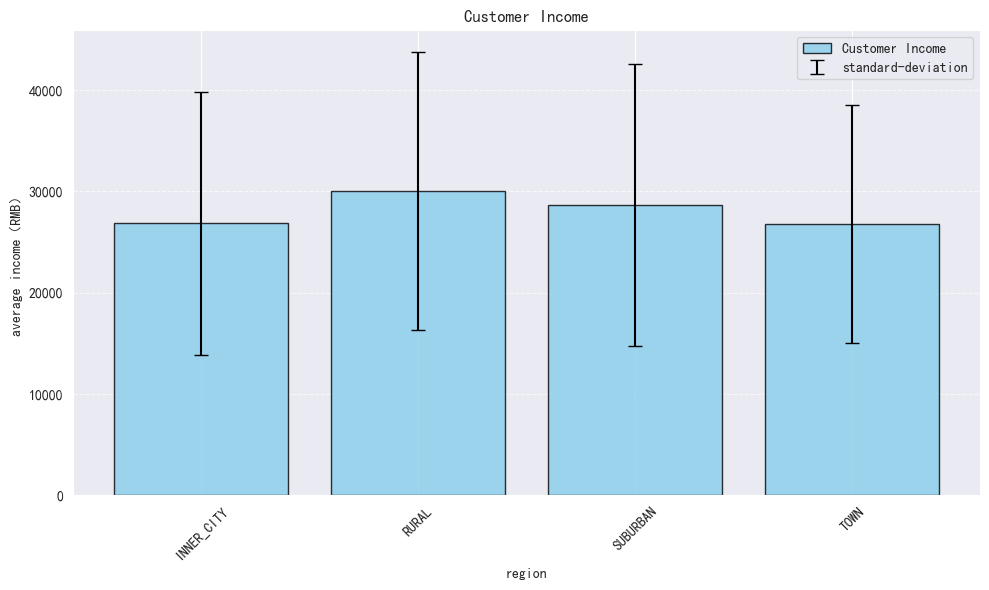

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# 设置中文字体和解决负号显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
data = pd.read_csv("bankpep.csv")

# 提取年龄数据

incomes=data['income'].dropna()
regions=data['region'].dropna()


# 合并为DataFrame用于分组统计
df = pd.DataFrame({'region': regions, 'income': incomes})

# 计算每个地区的平均收入和标准差
grouped = df.groupby('region')['income'].agg(['mean', 'std']).reset_index()
grouped['std'] = grouped['std'].fillna(0)

# 创建图表
plt.figure(figsize=(10, 6))

# 绘制柱状图
bars = plt.bar(grouped['region'], grouped['mean'],
               color='skyblue', edgecolor='black', alpha=0.8, label='Customer Income')

# 添加标准差误差线
plt.errorbar(grouped['region'], grouped['mean'],
             yerr=grouped['std'],
             fmt='none',  # 不绘制中心点
             ecolor='black',  # 误差线颜色
             capsize=5,     # 误差线帽子大小
             linewidth=1.5, # 误差线粗细
             label='standard-deviation')
# 设置样式
plt.title('Customer Income')
plt.xlabel('region')
plt.ylabel('average income（RMB）')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend()
# 旋转x轴标签防止重叠（如果地区名称较长）
plt.xticks(rotation=45)
# 自动调整布局
plt.tight_layout()

# 显示图表
plt.show()

In [ ]:
# （5）多子图绘制：账户中性别占比饼图，有车的性别占比饼图，按孩子数的账户占比饼图

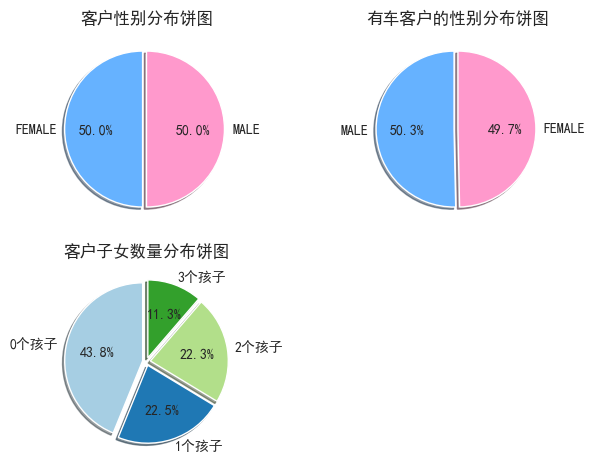

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
# 读取数据
data = pd.read_csv("bankpep.csv")
# 设置中文字体和解决负号显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
fig=plt.figure()
chart1=fig.add_subplot(2,2,1)
chart2=fig.add_subplot(2,2,2)
chart3=fig.add_subplot(2,2,3)
# 提取年龄数据
sex=data['sex'].dropna()
# 统计男女数量
gender_counts = sex.value_counts()  # 自动统计 "male" 和 "female" 的数量


chart1.pie(
    gender_counts,
    labels=gender_counts.index,  # 自动使用 "male" 和 "female" 作为标签
    autopct='%1.1f%%',           # 显示百分比，保留一位小数
    colors=['#66B2FF', '#FF99CC'],  # 自定义颜色（蓝、粉）
    explode=[0.05, 0],           # 突出显示第一个扇区（如 female）
    shadow=True,                 # 添加阴影效果
    startangle=90                # 起始角度为 90 度（垂直开始）
)
# 设置标题
chart1.set_title('客户性别分布饼图')

# 筛选有车的客户（car=YES）
car_owners = data[data['car'] == 'YES']
# 提取性别数据并清洗（统一转为大写，避免大小写不一致问题）
gender_data = car_owners['sex'].str.upper().dropna()
# 统计男女数量
gender_counts = gender_data.value_counts()  # 自动统计 "MALE" 和 "FEMALE" 的数量

chart2.pie(
    gender_counts,
    labels=gender_counts.index,  # 自动使用 "MALE" 和 "FEMALE" 作为标签
    autopct='%1.1f%%',          # 显示百分比，保留一位小数
    colors=['#66B2FF', '#FF99CC'],  # 蓝色（男）、粉色（女）
    explode=[0.05, 0],          # 突出显示第一个扇区（如女性）
    shadow=True,                # 添加阴影效果
    startangle=90               # 起始角度为 90 度（垂直开始）
)

# 设置标题
chart2.set_title('有车客户的性别分布饼图')


# 提取孩子数量字段并清洗（确保为整数类型）
children = data['children'].dropna().astype(int)

# 统计每个孩子数量的客户数量（按升序排序）
children_counts = children.value_counts().sort_index()

# 计算百分比（保留一位小数）
children_percent = (children_counts / children_counts.sum()) * 100
children_percent = children_percent.round(1)  # 保留一位小数

chart3.pie(
    children_counts,
    labels=[f'{x}个孩子' for x in children_counts.index],  # 标签格式
    autopct='%1.1f%%',  # 显示百分比（保留一位小数）
    colors=plt.cm.Paired.colors,  # 使用默认配色
    explode=[0.05] * len(children_counts),  # 所有扇形略微分离
    shadow=True,  # 添加阴影
    startangle=90  # 起始角度为90度
)

# 设置标题
chart3.set_title('客户子女数量分布饼图')
# 自动调整布局
plt.tight_layout()

# 显示图表
plt.show()

In [ ]:
#（6）各性别收入的箱须图

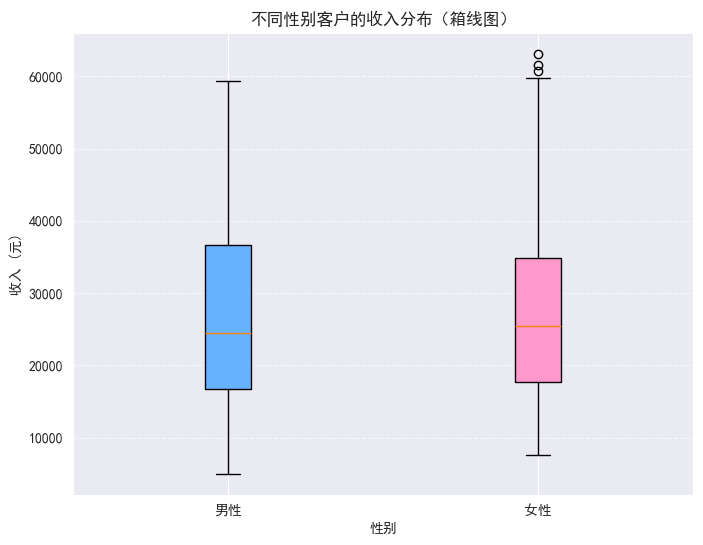

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# 设置中文字体和解决负号显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
data = pd.read_csv("bankpep.csv")

# 提取并清洗数据
# 确保 sex 字段统一为大写，income 为数值类型
data['sex'] = data['sex'].str.upper().dropna()
data['income'] = pd.to_numeric(data['income'], errors='coerce')

# 按性别分组收集收入数据
male_income = data[data['sex'] == 'MALE']['income'].dropna()
female_income = data[data['sex'] == 'FEMALE']['income'].dropna()

# 创建箱线图数据和标签
income_data = [male_income, female_income]
labels = ['男性', '女性']

# 创建图表
plt.figure(figsize=(8, 6))

# 绘制箱线图
bplot = plt.boxplot(income_data, tick_labels=labels, patch_artist=True)
# 设置颜色（可选）
colors = ['#66B2FF', '#FF99CC']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

# 设置标题和轴标签
plt.title('不同性别客户的收入分布（箱线图）')
plt.xlabel('性别')
plt.ylabel('收入 (元)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# 显示图表
plt.show()
